In [127]:
#2025_Y2_S1_MLB_B2G1_06
#Handle Missing Values
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [128]:
#Load the dataset
df=pd.read_csv('data_file.csv')

In [129]:
#Display first and last rows
print("First 5 rows:")
display(df.head())
print("\nLast 5 rows:")
display(df.tail())

First 5 rows:


,FileName,md5Hash,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,0124e21d-018c-4ce0-92a3-b9e205a76bc0.dll,79755c51e413ed3c6be4635fd729a6e1,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
1,05c8318f98a5d301d80000009c316005.vertdll.dll,95e19f3657d34a432eada93221b0ea16,34404,84,121728,10,10,126576,4930,0,14,10,8,262144,16864,1024,0,1
2,06054fba-5619-4a86-a861-ffb0464bef5d.dll,85c32641d77a54e19ba8ea4ab305c791,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
3,075822ac99a5d301660400009c316005.adhapi.dll,62e3b959d982ef534b66f819fe15f085,34404,84,19904,10,10,21312,252,18160,14,10,6,262144,16736,1040,0,1
4,090607dd9ba5d301ca0900009c316005.SensorsNative...,ae38c5f7d313ad0ff3bfb8826476767f,34404,84,97728,10,10,105792,1852,70592,14,10,7,262144,16736,1096,0,1



Last 5 rows:


,FileName,md5Hash,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
62480,VirusShare_a43ceb5e5fffc793e0205d15a0606cb0,a43ceb5e5fffc793e0205d15a0606cb0,332,0,0,1,4,0,0,4096,6,0,3,1048576,0,23504,0,0
62481,VirusShare_0190dafc8304111a00fccf57340ea6a4,0190dafc8304111a00fccf57340ea6a4,332,0,0,7,10,0,0,0,7,0,7,1048576,0,15704,0,0
62482,VirusShare_0f3ca55979aaf59158d6b01140696e44,0f3ca55979aaf59158d6b01140696e44,332,0,0,0,4,0,0,404908,2,50,11,1048576,0,2364,0,0
62483,VirusShare_fca5ce35f1690db6babca5aa5d559535,fca5ce35f1690db6babca5aa5d559535,332,0,0,0,4,14448,70,4096,8,0,4,1048576,0,130296,0,0
62484,VirusShare_d7955a7e6d1e16800feafd4204cbac2b,d7955a7e6d1e16800feafd4204cbac2b,332,0,0,0,5,0,0,4096,9,0,6,1048576,0,6912,0,0


In [130]:
#check data types
print("\nData Types:")
print(df.dtypes)


Data Types:
FileName              object
md5Hash               object
Machine                int64
DebugSize              int64
DebugRVA               int64
MajorImageVersion      int64
MajorOSVersion         int64
ExportRVA              int64
ExportSize             int64
IatVRA                 int64
MajorLinkerVersion     int64
MinorLinkerVersion     int64
NumberOfSections       int64
SizeOfStackReserve     int64
DllCharacteristics     int64
ResourceSize           int64
BitcoinAddresses       int64
Benign                 int64
dtype: object


In [131]:
#Remove irrelevant columns
df=df.drop(['FileName','md5Hash'],axis=1,errors='ignore')

In [132]:
#Check and report missing values
print("\nMissing values report:")
missing_values=df.isnull().sum()
print(missing_values)
if missing_values.sum()==0:
    print("No missing values found.")
else:
    print("Missing values present;")


Missing values report:
Machine               0
DebugSize             0
DebugRVA              0
MajorImageVersion     0
MajorOSVersion        0
ExportRVA             0
ExportSize            0
IatVRA                0
MajorLinkerVersion    0
MinorLinkerVersion    0
NumberOfSections      0
SizeOfStackReserve    0
DllCharacteristics    0
ResourceSize          0
BitcoinAddresses      0
Benign                0
dtype: int64
No missing values found.


In [133]:
#check for duplicate rows
#check dimension of the dataframe
print("\nShape of dataframe",df.shape)


Shape of dataframe (62485, 16)


In [134]:
#find the duplicate rows
duplicate_rows_df=df[df.duplicated()]
print("\nNumber of duplicate rows:",duplicate_rows_df.shape[0])
if duplicate_rows_df.shape[0]==0:
    print("No duplicate entries found.")


Number of duplicate rows: 30229


In [135]:
#remove duplicate rows
df=df.drop_duplicates()
print("\nShape after removing duplicates:",df.shape)
print("Confirmed no duplicate entries after removal.")


Shape after removing duplicates: (32256, 16)
Confirmed no duplicate entries after removal.


In [136]:
#Drop missing or null values
df=df.dropna()
print("\nShape after dropping missing values:",df.shape)


Shape after dropping missing values: (32256, 16)


In [137]:
# IT24104206 - Nawarathna M.S.G.
# Detect and Removing Outliers

In [138]:
#detect outliers in numerical features
outlier_cols=['DebugSize','ExportSize','ResourceSize']

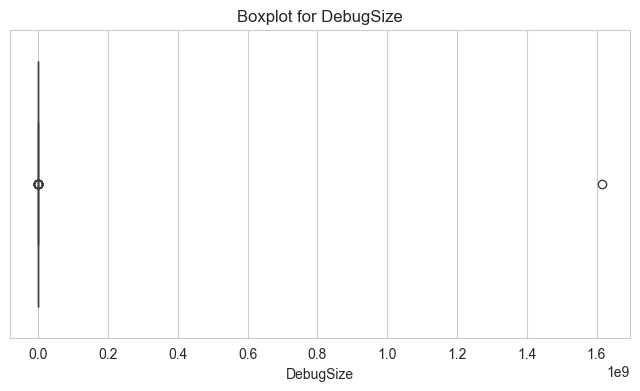

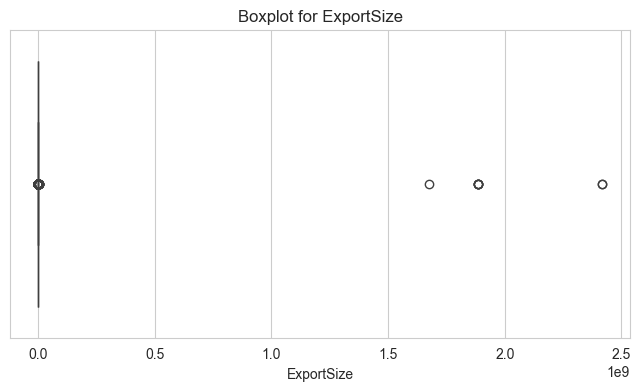

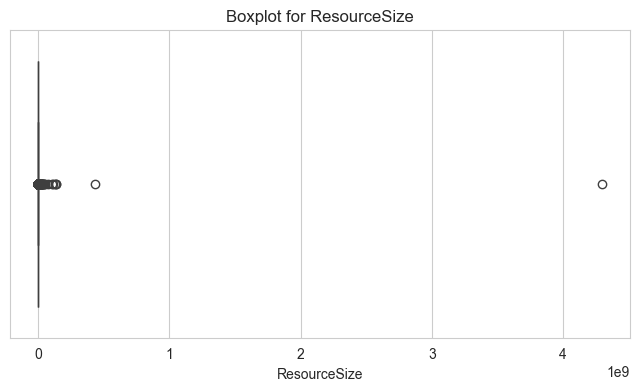

In [139]:
#box plots for selected variables
for col in outlier_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

In [140]:
#check skewness and apply log transform if skewed
for col in outlier_cols:
    skewness=df[col].skew()
    print(f"\nSkewness of {col}: {skewness}")
    if abs(skewness) >1 and (df[col] >0).all():
        print(f"Applying log transform to {col} due to high skewness.")
        df[col]=np.log1p(df[col])
    else:
        print(f"No log transform applied to {col}.")
        


Skewness of DebugSize: 179.59955456093692
No log transform applied to DebugSize.

Skewness of ExportSize: 65.09473094948198
No log transform applied to ExportSize.

Skewness of ResourceSize: 175.49716402889325
No log transform applied to ResourceSize.


In [141]:
#calculate Q1,Q2,Q3,IQR for numeric columns afet log transform
numeric_cols=df.select_dtypes(include=np.number).columns
Q1=df[numeric_cols].quantile(0.25)
Q3=df[numeric_cols].quantile(0.75)
IQR=Q3-Q1

In [142]:
#report number of outliers per column
for col in outlier_cols:
    outliers=((df[col] < (Q1[col]- 1.5 * IQR[col])) | (df[col] > (Q3[col] + 1.5 * IQR[col]))).sum()
    print(f"Number of outliers in {col}:{outliers}")

Number of outliers in DebugSize:18
Number of outliers in ExportSize:4595
Number of outliers in ResourceSize:5277


In [143]:
#remove outliers using IQR
condition= ~ ((df[numeric_cols] < (Q1- 1.5 * IQR)) | (df[numeric_cols] >(Q3 + 1.5 * IQR ))).any(axis=1)
df=df[condition]
print("\nShape after removing outliers:",df.shape)


Shape after removing outliers: (15222, 16)



Boxplots AFTER Outlier Removal 


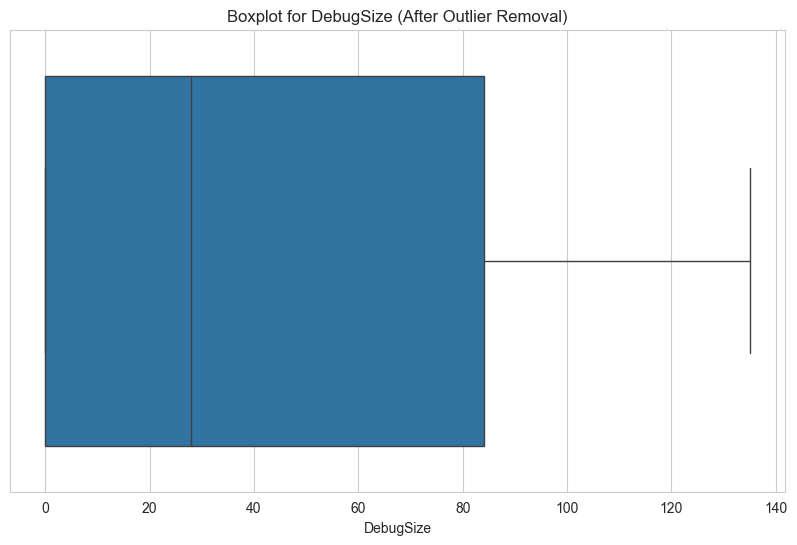

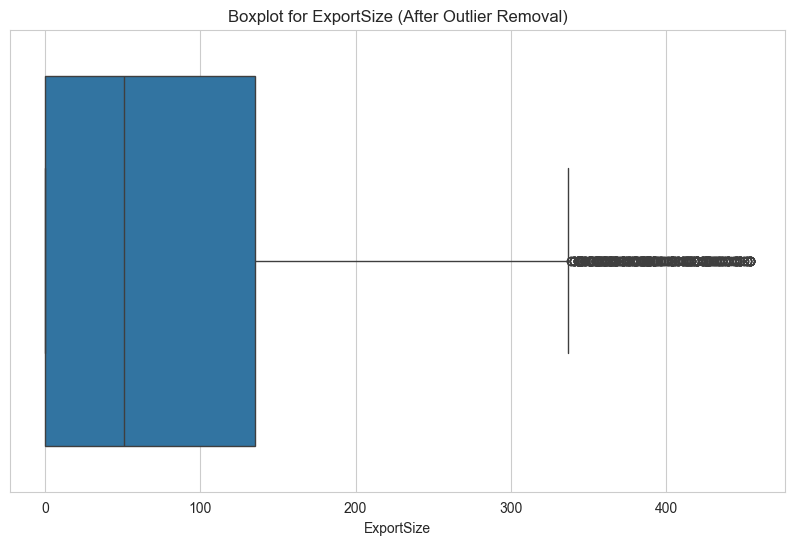

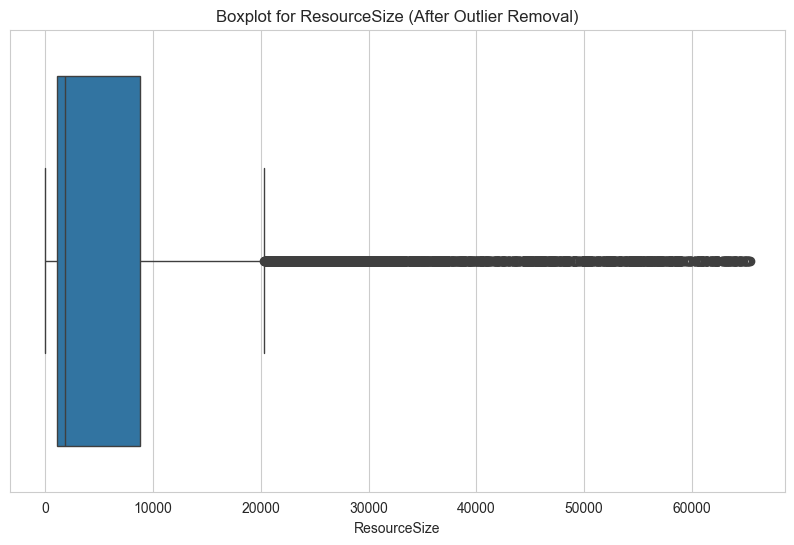

In [144]:
#After outlier removal boxplot
outlier_cols = ["DebugSize", "ExportSize", "ResourceSize"]

print("\nBoxplots AFTER Outlier Removal ")
for col in outlier_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col} (After Outlier Removal)')
    plt.xlabel(col)
    plt.show()

In [145]:
# IT24104192 - Weerasooriya W.H.M.S.P
# Data Transformation Part (Scaling, Normalization ans Distribution Adjustments)

In [146]:
# Select numerical features for transformation

numeric_cols = df.select_dtypes(include=np.number).columns
print("\nNumerical columns for transformation : ",numeric_cols.tolist())


Numerical columns for transformation :  ['Machine', 'DebugSize', 'DebugRVA', 'MajorImageVersion', 'MajorOSVersion', 'ExportRVA', 'ExportSize', 'IatVRA', 'MajorLinkerVersion', 'MinorLinkerVersion', 'NumberOfSections', 'SizeOfStackReserve', 'DllCharacteristics', 'ResourceSize', 'BitcoinAddresses', 'Benign']


In [84]:
# Handle remaining skewness (if any)

for col in numeric_cols:
    skewness = df[col].skew()
    print(f"\nSkewness of {col}: {skewness}")
    if abs(skewness) > 1 and (df[col] > 0).all():   # log only positive data
        print(f"Applying log1p transform to {col}")
        df[col] = np.log1p(df[col])
    else:
        print(f"No log transform applied to {col}")


Skewness of Machine: 0.7499238642021844
No log transform applied to Machine

Skewness of DebugSize: 0.5124329927752601
No log transform applied to DebugSize

Skewness of DebugRVA: 2.2948868537338614
No log transform applied to DebugRVA

Skewness of MajorImageVersion: 0.12114487396131887
No log transform applied to MajorImageVersion

Skewness of MajorOSVersion: 0.6639574262153427
No log transform applied to MajorOSVersion

Skewness of ExportRVA: 2.1705789724674314
No log transform applied to ExportRVA

Skewness of ExportSize: 1.3093970477225985
No log transform applied to ExportSize

Skewness of IatVRA: 2.0458579388761513
No log transform applied to IatVRA

Skewness of MajorLinkerVersion: -0.28027421605971553
No log transform applied to MajorLinkerVersion

Skewness of MinorLinkerVersion: 1.2449902100975938
No log transform applied to MinorLinkerVersion

Skewness of NumberOfSections: 0.1963210676254088
No log transform applied to NumberOfSections

Skewness of SizeOfStackReserve: 0.21009

In [147]:
# Apply power transforms for distributions that are still skewed

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')  # safer, handles negative values too
df_transformed = df.copy()
df_transformed[numeric_cols] = pt.fit_transform(df[numeric_cols])

print("\nApplied Yeo-Johnson Power Transformation to adjust skewness.")


Applied Yeo-Johnson Power Transformation to adjust skewness.


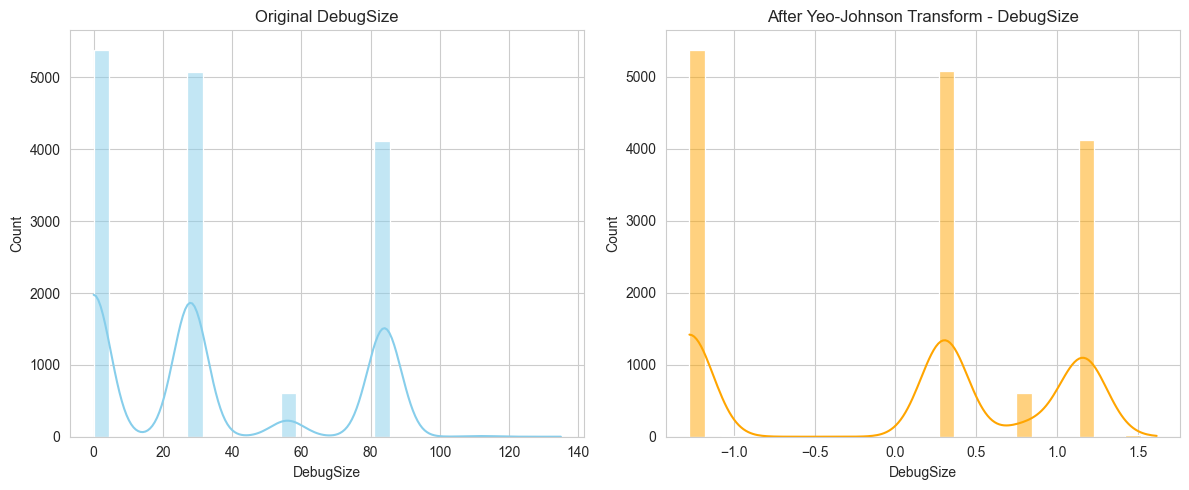

In [148]:
# Before distribution adjusment vs after histograms (fix skewness)

import matplotlib.pyplot as plt
import seaborn as sns

feature = "DebugSize" # The feature can be changed. This is for DebugSize.

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df[feature], kde=True, bins=30, color="skyblue")
plt.title(f"Original {feature}")

plt.subplot(1,2,2)
sns.histplot(df_transformed[feature], kde=True, bins=30, color="orange")
plt.title(f"After Yeo-Johnson Transform - {feature}")

plt.tight_layout()
plt.show()


Correlation Matrix:


,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
Machine,1.00,0.45,0.46,0.45,0.42,0.25,0.27,0.04,0.36,0.17,0.29,-0.33,0.27,-0.13,NaN,0.52
DebugSize,0.45,1.00,0.92,0.63,0.72,0.40,0.43,0.23,0.77,0.49,0.25,-0.47,0.56,-0.17,NaN,0.78
DebugRVA,0.46,0.92,1.00,0.46,0.54,0.33,0.36,0.26,0.64,0.32,0.26,-0.40,0.52,-0.16,NaN,0.72
MajorImageVersion,0.45,0.63,0.46,1.00,0.80,0.41,0.43,-0.02,0.56,0.43,0.11,-0.57,0.32,-0.09,NaN,0.61
MajorOSVersion,0.42,0.72,0.54,0.80,1.00,0.39,0.41,0.15,0.78,0.57,0.23,-0.57,0.50,-0.11,NaN,0.58
ExportRVA,0.25,0.40,0.33,0.41,0.39,1.00,0.98,0.15,0.29,0.21,0.27,-0.44,-0.10,-0.19,NaN,0.31
ExportSize,0.27,0.43,0.36,0.43,0.41,0.98,1.00,0.14,0.32,0.22,0.26,-0.43,-0.08,-0.20,NaN,0.35
IatVRA,0.04,0.23,0.26,-0.02,0.15,0.15,0.14,1.00,0.29,0.15,0.53,0.20,0.25,0.00,NaN,0.04
MajorLinkerVersion,0.36,0.77,0.64,0.56,0.78,0.29,0.32,0.29,1.00,0.50,0.21,-0.36,0.64,-0.15,NaN,0.64
MinorLinkerVersion,0.17,0.49,0.32,0.43,0.57,0.21,0.22,0.15,0.50,1.00,0.24,-0.20,0.24,-0.07,NaN,0.26


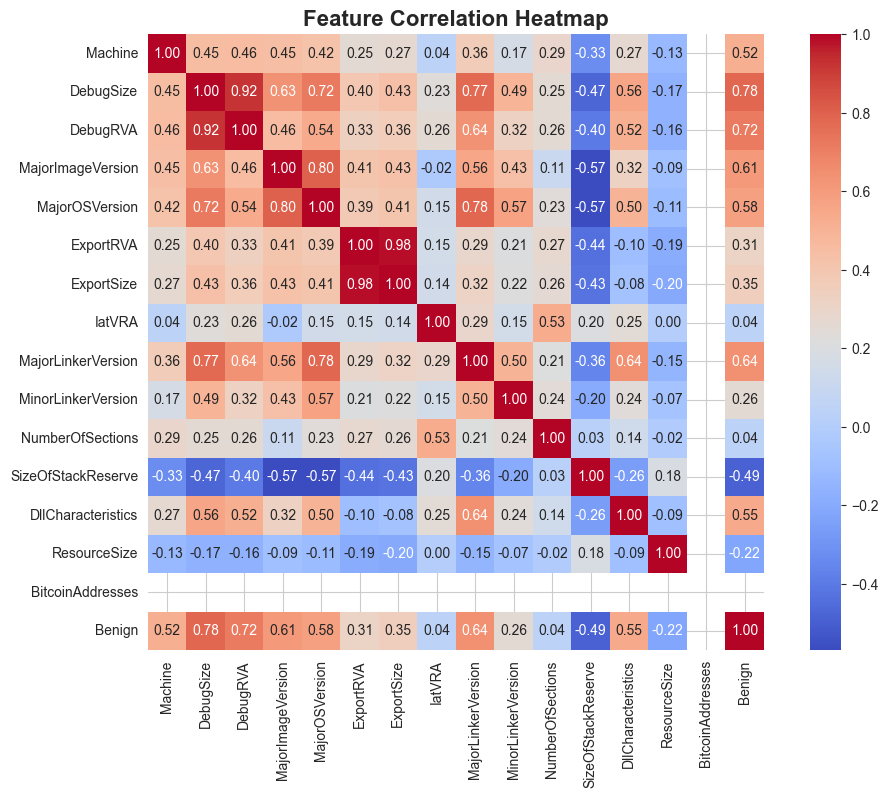

In [149]:
# Check Correlations between numerical features

corr_matrix = df_transformed[numeric_cols].corr()  # using skewness-adjusted data

print("\nCorrelation Matrix:")
display(corr_matrix.round(2))

# Visualize correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Feature Correlation Heatmap", fontsize=16, fontweight='bold')
plt.show()

In [150]:
# Handle highly corrolated features

threshold = 0.85
high_corr = []

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            col_pair = (corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])
            high_corr.append(col_pair)

print("\nHighly correlated feature pairs (|corr| > 0.85):")
for pair in high_corr:
    print(pair)


Highly correlated feature pairs (|corr| > 0.85):
('DebugRVA', 'DebugSize', np.float64(0.9249166905789193))
('ExportSize', 'ExportRVA', np.float64(0.9836218019644387))


Columns available in df_transformed:
['Machine', 'DebugSize', 'DebugRVA', 'MajorImageVersion', 'MajorOSVersion', 'ExportRVA', 'ExportSize', 'IatVRA', 'MajorLinkerVersion', 'MinorLinkerVersion', 'NumberOfSections', 'SizeOfStackReserve', 'DllCharacteristics', 'ResourceSize', 'BitcoinAddresses', 'Benign']

Columns after combining correlated features:
['Machine', 'MajorImageVersion', 'MajorOSVersion', 'IatVRA', 'MajorLinkerVersion', 'MinorLinkerVersion', 'NumberOfSections', 'SizeOfStackReserve', 'DllCharacteristics', 'ResourceSize', 'BitcoinAddresses', 'Benign', 'DebugCombined', 'ExportCombined']

Correlation Matrix After Combining Features:


,Machine,MajorImageVersion,MajorOSVersion,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign,DebugCombined,ExportCombined
Machine,1.00,0.45,0.42,0.04,0.36,0.17,0.29,-0.33,0.27,-0.13,NaN,0.52,0.47,0.26
MajorImageVersion,0.45,1.00,0.80,-0.02,0.56,0.43,0.11,-0.57,0.32,-0.09,NaN,0.61,0.56,0.42
MajorOSVersion,0.42,0.80,1.00,0.15,0.78,0.57,0.23,-0.57,0.50,-0.11,NaN,0.58,0.64,0.40
IatVRA,0.04,-0.02,0.15,1.00,0.29,0.15,0.53,0.20,0.25,0.00,NaN,0.04,0.25,0.15
MajorLinkerVersion,0.36,0.56,0.78,0.29,1.00,0.50,0.21,-0.36,0.64,-0.15,NaN,0.64,0.72,0.30
MinorLinkerVersion,0.17,0.43,0.57,0.15,0.50,1.00,0.24,-0.20,0.24,-0.07,NaN,0.26,0.42,0.21
NumberOfSections,0.29,0.11,0.23,0.53,0.21,0.24,1.00,0.03,0.14,-0.02,NaN,0.04,0.26,0.27
SizeOfStackReserve,-0.33,-0.57,-0.57,0.20,-0.36,-0.20,0.03,1.00,-0.26,0.18,NaN,-0.49,-0.45,-0.43
DllCharacteristics,0.27,0.32,0.50,0.25,0.64,0.24,0.14,-0.26,1.00,-0.09,NaN,0.55,0.55,-0.09
ResourceSize,-0.13,-0.09,-0.11,0.00,-0.15,-0.07,-0.02,0.18,-0.09,1.00,NaN,-0.22,-0.17,-0.20


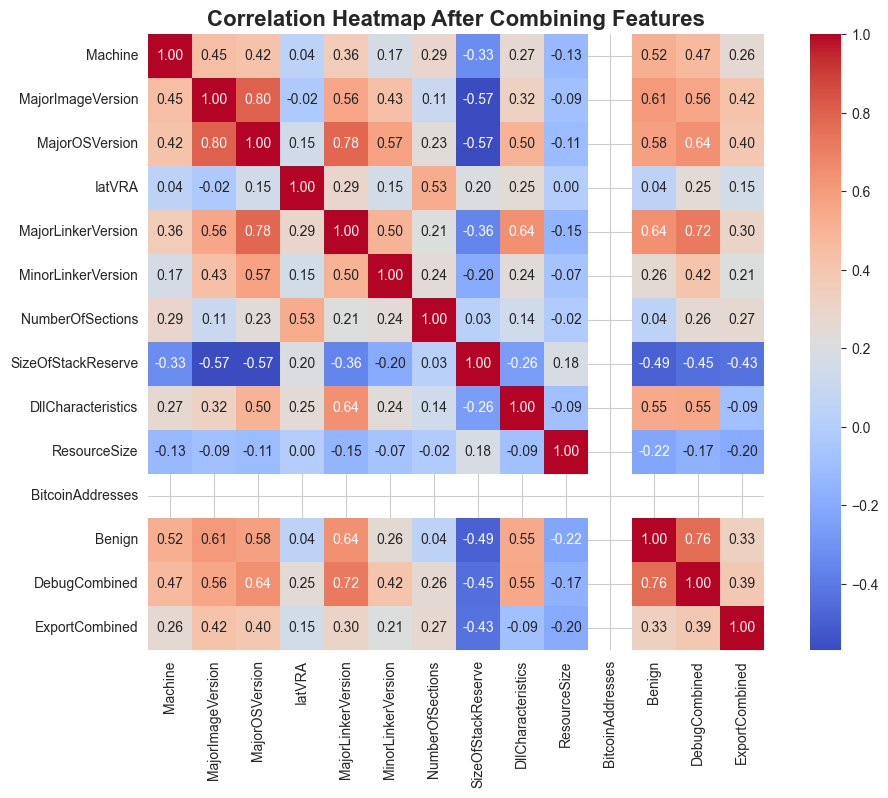

In [151]:
# Combine those features

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Make a copy of transformed dataset
df_combined = df_transformed.copy()  

# Check available columns
print("Columns available in df_transformed:")
print(df_combined.columns.tolist())

# Only combine if both columns exist
if 'DebugSize' in df_combined.columns and 'DebugRVA' in df_combined.columns:
    df_combined['DebugCombined'] = df_combined['DebugSize'] + df_combined['DebugRVA']
    
if 'ExportSize' in df_combined.columns and 'ExportRVA' in df_combined.columns:
    df_combined['ExportCombined'] = df_combined['ExportSize'] + df_combined['ExportRVA']

# Drop original correlated columns 
df_combined.drop(columns=['DebugSize','DebugRVA','ExportSize','ExportRVA'], inplace=True, errors='ignore')

print("\nColumns after combining correlated features:")
print(df_combined.columns.tolist())

corr_matrix_combined = df_combined.corr() #after combination

print("\nCorrelation Matrix After Combining Features:")
display(corr_matrix_combined.round(2))

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix_combined, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap After Combining Features", fontsize=16, fontweight='bold')
plt.show()

In [152]:
# Standardization (Z-score scaling)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("\nStandardization applied. Mean ~ 0, Std ~ 1 for numeric columns.")

print("\n--- Standardized Data Summary ---")
print(df_standardized[numeric_cols].agg(['mean','std']).round(2))


Standardization applied. Mean ~ 0, Std ~ 1 for numeric columns.

--- Standardized Data Summary ---
      Machine  DebugSize  DebugRVA  MajorImageVersion  MajorOSVersion  \
mean      0.0        0.0      -0.0                0.0            -0.0   
std       1.0        1.0       1.0                1.0             1.0   

      ExportRVA  ExportSize  IatVRA  MajorLinkerVersion  MinorLinkerVersion  \
mean        0.0         0.0     0.0                 0.0                 0.0   
std         1.0         1.0     1.0                 1.0                 1.0   

      NumberOfSections  SizeOfStackReserve  DllCharacteristics  ResourceSize  \
mean               0.0                -0.0                 0.0          -0.0   
std                1.0                 1.0                 1.0           1.0   

      BitcoinAddresses  Benign  
mean               0.0     0.0  
std                0.0     1.0  


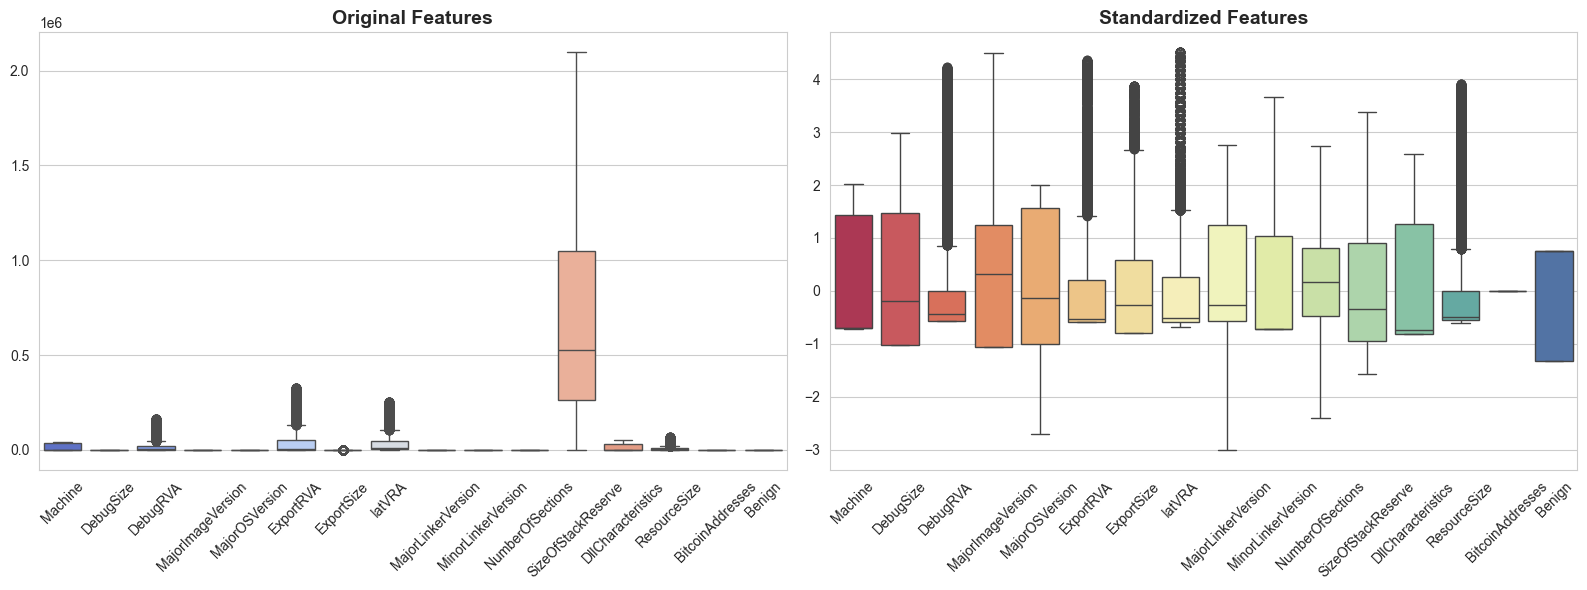

In [153]:
# Before Standardization vs after boxplots  

import matplotlib.pyplot as plt
import seaborn as sns

# Set styles
sns.set_style("whitegrid")
palette_original = sns.color_palette("coolwarm", len(numeric_cols))
palette_standardized = sns.color_palette("Spectral", len(numeric_cols))

plt.figure(figsize=(16,6))

# Original features boxplot
plt.subplot(1,2,1)
sns.boxplot(data=df[numeric_cols], palette=palette_original)
plt.title("Original Features", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)

# Standardized features boxplot
plt.subplot(1,2,2)
sns.boxplot(data=df_standardized[numeric_cols], palette=palette_standardized)
plt.title("Standardized Features", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [154]:
# Normalization (Min-Max scaling)

from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numeric_cols] = minmax_scaler.fit_transform(df[numeric_cols])

print("\nNormalization applied. All values scaled between 0 and 1.")


Normalization applied. All values scaled between 0 and 1.


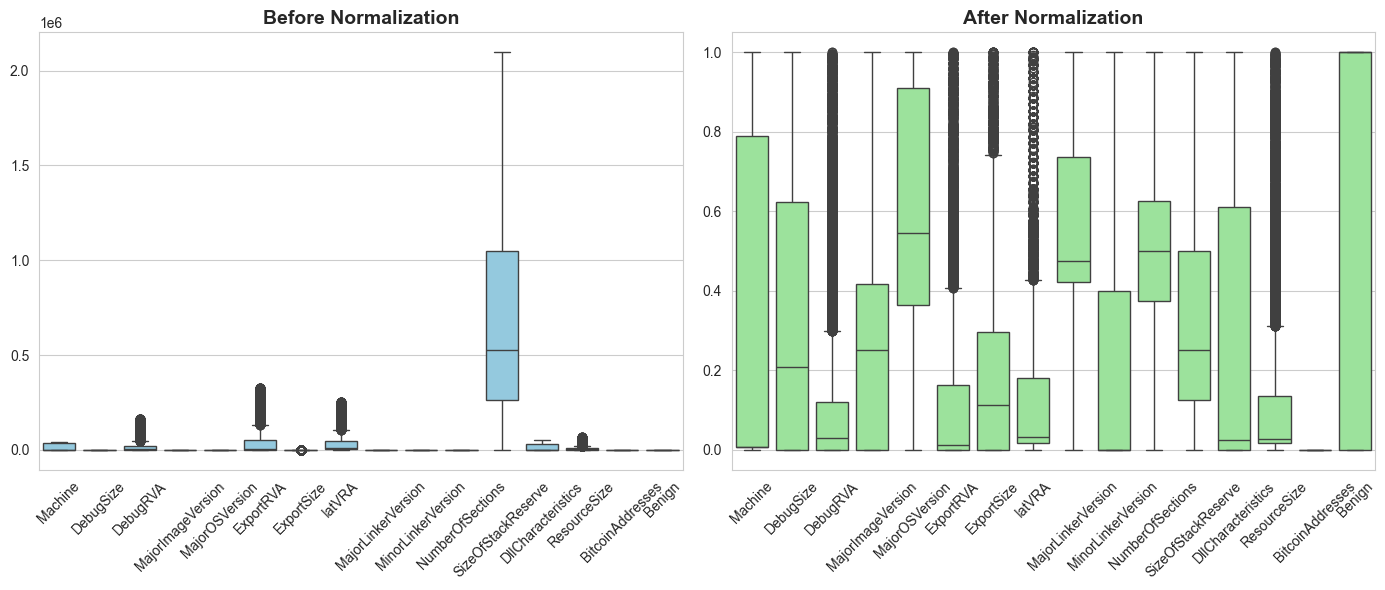

In [155]:
# Before Normalization vs after boxplots 

sns.set_style("whitegrid")

plt.figure(figsize=(14,6))

# Boxplot before normalization
plt.subplot(1,2,1)
sns.boxplot(data=df[numeric_cols], color="skyblue")
plt.title("Before Normalization", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)

# Boxplot after normalization
plt.subplot(1,2,2)
sns.boxplot(data=df_normalized[numeric_cols], color="lightgreen")
plt.title("After Normalization", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [156]:
# Recheck outliers 

df_final = df_combined.copy()  

numeric_cols = df_final.select_dtypes(include=np.number).columns.tolist()

Q1 = df_final[numeric_cols].quantile(0.25)
Q3 = df_final[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_counts = {}
for col in numeric_cols:
    outliers = ((df_final[col] < (Q1[col] - 1.5 * IQR[col])) |
                (df_final[col] > (Q3[col] + 1.5 * IQR[col]))).sum()
    outlier_counts[col] = outliers
    print(f"Number of outliers in {col}: {outliers}")

Number of outliers in Machine: 1
Number of outliers in MajorImageVersion: 0
Number of outliers in MajorOSVersion: 6
Number of outliers in IatVRA: 0
Number of outliers in MajorLinkerVersion: 0
Number of outliers in MinorLinkerVersion: 0
Number of outliers in NumberOfSections: 223
Number of outliers in SizeOfStackReserve: 0
Number of outliers in DllCharacteristics: 0
Number of outliers in ResourceSize: 482
Number of outliers in BitcoinAddresses: 0
Number of outliers in Benign: 0
Number of outliers in DebugCombined: 0
Number of outliers in ExportCombined: 0


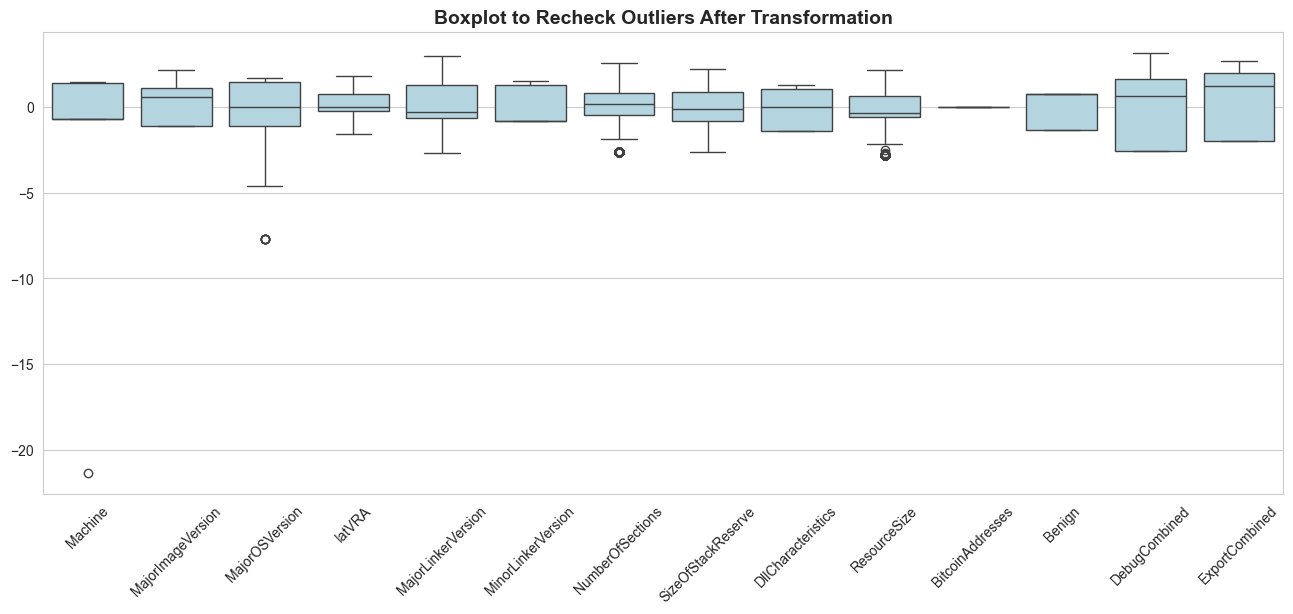

In [157]:
plt.figure(figsize=(16,6))
sns.boxplot(data=df_final[numeric_cols], color="lightblue")
plt.title("Boxplot to Recheck Outliers After Transformation", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.show()

In [158]:
# Cap Outliers

df_capped = df_final.copy()
for col in numeric_cols:
    lower = Q1[col] - 1.5 * IQR[col]
    upper = Q3[col] + 1.5 * IQR[col]
    df_capped[col] = np.where(df_capped[col] < lower, lower, df_capped[col])
    df_capped[col] = np.where(df_capped[col] > upper, upper, df_capped[col])

print("Shape before capping:", df_final.shape)
print("\nOutliers capped using Winsorization.")
print("Shape after capping:", df_capped.shape)

Shape before capping: (15222, 14)

Outliers capped using Winsorization.
Shape after capping: (15222, 14)


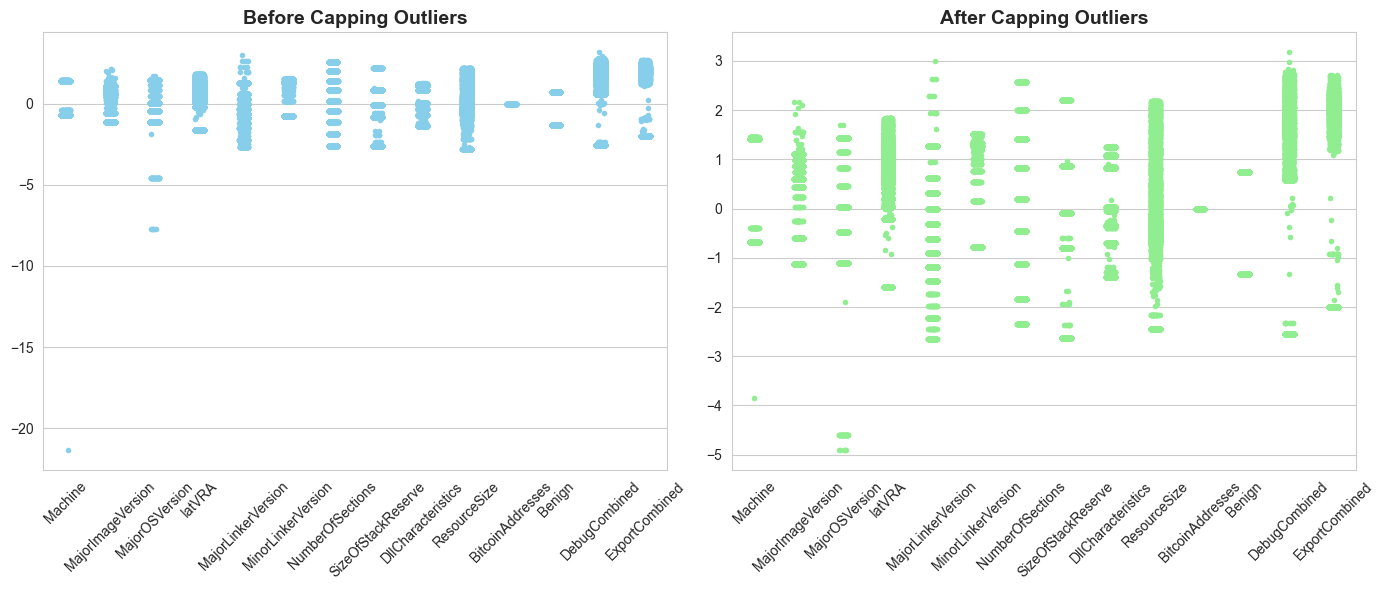

In [159]:
plt.figure(figsize=(14,6))

# Before capping
plt.subplot(1,2,1)
sns.stripplot(data=df_final[numeric_cols], jitter=True, size=4, color='skyblue')
plt.title("Before Capping Outliers", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)

# After capping
plt.subplot(1,2,2)
sns.stripplot(data=df_capped[numeric_cols], jitter=True, size=4, color='lightgreen')
plt.title("After Capping Outliers", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [160]:
# IT24104198 – Dahanayake D.Y.
# Categorical Encoding (Drop IDs, One-Hot, EDA, Save Artifacts)

In [161]:
import pandas as pd
import numpy as np

# 1) Drop irrelevant ID columns if they exist
id_cols = [c for c in ["FileName", "md5Hash"] if c in df.columns]
if id_cols:
    df = df.drop(columns=id_cols)
print("Dropped ID columns:", id_cols if id_cols else "None")

# 2) Identify the target column (adjust if your dataset uses a different name)
POSSIBLE_TARGETS = ["Benign", "Target", "label", "Label", "y"]
TARGET = next((t for t in POSSIBLE_TARGETS if t in df.columns), None)
print("Target column:", TARGET)

# 3) Detect categorical columns
#    - Columns with object/category dtype
#    - Integer columns with few unique values (≤20)
cat_cols = [c for c in df.columns
            if c != TARGET and (df[c].dtype == "object" or str(df[c].dtype).startswith("category"))]

for c in df.columns:
    if c not in cat_cols and c != TARGET:
        if pd.api.types.is_integer_dtype(df[c]) and df[c].nunique() <= 20:
            cat_cols.append(c)

# Remove duplicates and sort
cat_cols = sorted(list(dict.fromkeys(cat_cols)))

# Numerical columns are all remaining non-target columns
num_cols = [c for c in df.columns if c not in cat_cols + ([TARGET] if TARGET else [])]

print(f"Detected {len(cat_cols)} categorical columns:", cat_cols)
print(f"Detected {len(num_cols)} numerical columns:", num_cols[:10], "...")


Dropped ID columns: None
Target column: Benign
Detected 7 categorical columns: ['BitcoinAddresses', 'DebugSize', 'Machine', 'MajorLinkerVersion', 'MajorOSVersion', 'NumberOfSections', 'SizeOfStackReserve']
Detected 8 numerical columns: ['DebugRVA', 'MajorImageVersion', 'ExportRVA', 'ExportSize', 'IatVRA', 'MinorLinkerVersion', 'DllCharacteristics', 'ResourceSize'] ...


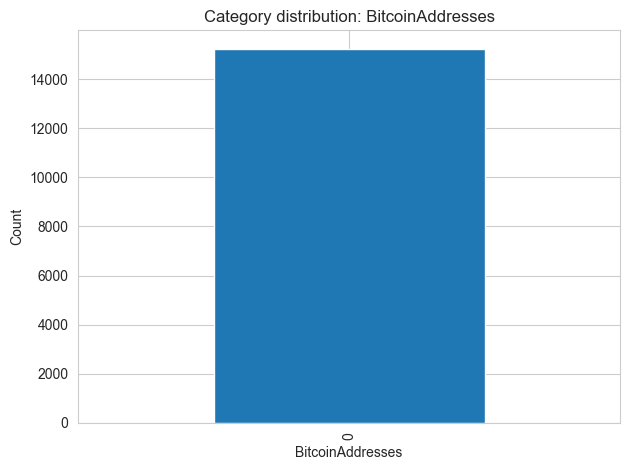

In [162]:
import matplotlib.pyplot as plt

# Show a bar chart of the first categorical column (if any)
if len(cat_cols) > 0:
    col0 = cat_cols[0]
    counts = df[col0].astype("category").value_counts().sort_values(ascending=False)
    
    plt.figure()
    counts.plot(kind="bar")
    plt.title(f"Category distribution: {col0}")
    plt.xlabel(col0)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()
else:
    print("No categorical columns found for plotting.")


In [163]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import joblib

# Numerical pipeline: fill missing values
num_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

# Categorical pipeline: impute missing values then One-Hot encode
# Use sparse_output=False for scikit-learn >=1.2
cat_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

# Combine into one preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", cat_pipe, cat_cols),
        ("num", num_pipe, num_cols)
    ],
    remainder="drop"
)

# Save unfitted preprocessor + metadata for Member 6
meta = {"TARGET": TARGET, "cat_cols": cat_cols, "num_cols": num_cols, "dropped_id_cols": id_cols}
joblib.dump(meta, "encoding_meta.joblib")
joblib.dump(preprocessor, "preprocessor_unfitted.joblib")

print("Saved: encoding_meta.joblib, preprocessor_unfitted.joblib")



Saved: encoding_meta.joblib, preprocessor_unfitted.joblib


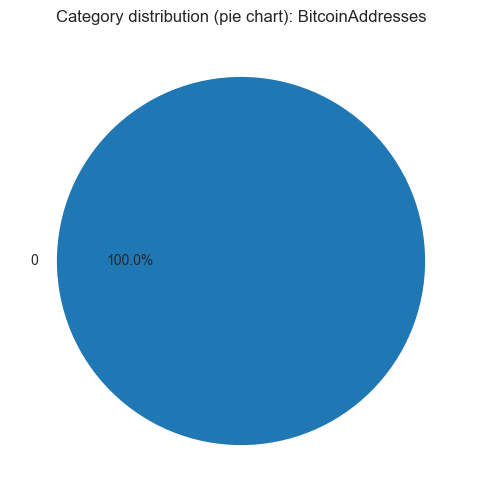

In [164]:
# Pie chart of first categorical column
if len(cat_cols) > 0:
    col0 = cat_cols[0]
    df[col0].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6))
    plt.title(f"Category distribution (pie chart): {col0}")
    plt.ylabel("")
    plt.show()


In [165]:
# IT24104167 – Jayawardena K.D
# Feature Engineering 

In [166]:
#before main process start quick check up of dataset

#Check column names
print("Columns :", df.columns.tolist())

#Check for missing values
print("Missing Values:\n", df.isnull().sum())

#check for data types
print("Data Types:\n", df.dtypes)

Columns : ['Machine', 'DebugSize', 'DebugRVA', 'MajorImageVersion', 'MajorOSVersion', 'ExportRVA', 'ExportSize', 'IatVRA', 'MajorLinkerVersion', 'MinorLinkerVersion', 'NumberOfSections', 'SizeOfStackReserve', 'DllCharacteristics', 'ResourceSize', 'BitcoinAddresses', 'Benign']
Missing Values:
 Machine               0
DebugSize             0
DebugRVA              0
MajorImageVersion     0
MajorOSVersion        0
ExportRVA             0
ExportSize            0
IatVRA                0
MajorLinkerVersion    0
MinorLinkerVersion    0
NumberOfSections      0
SizeOfStackReserve    0
DllCharacteristics    0
ResourceSize          0
BitcoinAddresses      0
Benign                0
dtype: int64
Data Types:
 Machine               int64
DebugSize             int64
DebugRVA              int64
MajorImageVersion     int64
MajorOSVersion        int64
ExportRVA             int64
ExportSize            int64
IatVRA                int64
MajorLinkerVersion    int64
MinorLinkerVersion    int64
NumberOfSections

In [167]:
#Explore Data

#check the shpae of dataset (rows and columns)
print("Shape of dataset : ", df.shape)
print()
# Check data types and non-null counts
df.info()
print()
# View basic statistics for numerical columns
df.describe()

Shape of dataset :  (15222, 16)

<class 'pandas.core.frame.DataFrame'>
Index: 15222 entries, 0 to 62469
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Machine             15222 non-null  int64
 1   DebugSize           15222 non-null  int64
 2   DebugRVA            15222 non-null  int64
 3   MajorImageVersion   15222 non-null  int64
 4   MajorOSVersion      15222 non-null  int64
 5   ExportRVA           15222 non-null  int64
 6   ExportSize          15222 non-null  int64
 7   IatVRA              15222 non-null  int64
 8   MajorLinkerVersion  15222 non-null  int64
 9   MinorLinkerVersion  15222 non-null  int64
 10  NumberOfSections    15222 non-null  int64
 11  SizeOfStackReserve  15222 non-null  int64
 12  DllCharacteristics  15222 non-null  int64
 13  ResourceSize        15222 non-null  int64
 14  BitcoinAddresses    15222 non-null  int64
 15  Benign              15222 non-null  int64
dtypes: int64(16)

,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
count,15222.000000,15222.000000,15222.000000,15222.000000,15222.000000,15222.000000,15222.000000,15222.000000,15222.000000,15222.000000,15222.000000,1.522200e+04,15222.000000,15222.000000,15222.0,15222.000000
mean,11433.422940,34.510905,19503.101498,4.591906,6.332808,39043.436014,77.700828,32506.441269,9.900801,4.079884,4.738865,6.655618e+05,12918.499934,8895.791683,0.0,0.638287
std,16001.121233,33.575670,33861.129834,4.318133,2.340644,66092.916506,97.332405,48161.447211,3.294376,5.711794,1.553906,4.230323e+05,15698.731283,14422.598577,0.0,0.480512
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.0,0.000000
25%,332.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,4096.000000,8.000000,0.000000,4.000000,2.621440e+05,0.000000,1061.000000,0.0,0.000000
50%,332.000000,28.000000,4720.000000,6.000000,6.000000,4128.000000,51.000000,8192.000000,9.000000,0.000000,5.000000,5.242880e+05,1344.000000,1848.000000,0.0,1.000000
75%,34404.000000,84.000000,19440.000000,10.000000,10.000000,53204.000000,135.000000,45056.000000,14.000000,10.000000,6.000000,1.048576e+06,32768.000000,8768.000000,0.0,1.000000
max,43620.000000,135.000000,162848.000000,24.000000,11.000000,327248.000000,454.000000,249856.000000,19.000000,25.000000,9.000000,2.097152e+06,53600.000000,65376.000000,0.0,1.000000


In [168]:
#create new features to detect ransomware more effectively.

#feature 1 - Debug Density
#this feature measures how much debug data is packed into the address space.
#add a small constant (1e-5) to avoid division by zero

df['debug_density'] = df['DebugSize'] / (df['DebugRVA'] + 1e-5)

#feature 2 - Stack Reserve Per Section
#this feature show how much memory is reserved per code section

df['stack_reserve_per_section'] = df['SizeOfStackReserve'] / (df['NumberOfSections'] + 1e-5)

In [169]:
#preview new features

#display first five rows of the new features to verify
df[['debug_density', 'stack_reserve_per_section']].head()

,debug_density,stack_reserve_per_section
0,0.000000,349524.168253
3,0.004220,43690.593849
9,0.001298,43690.593849
12,0.001497,37449.089358
13,0.003414,37449.089358


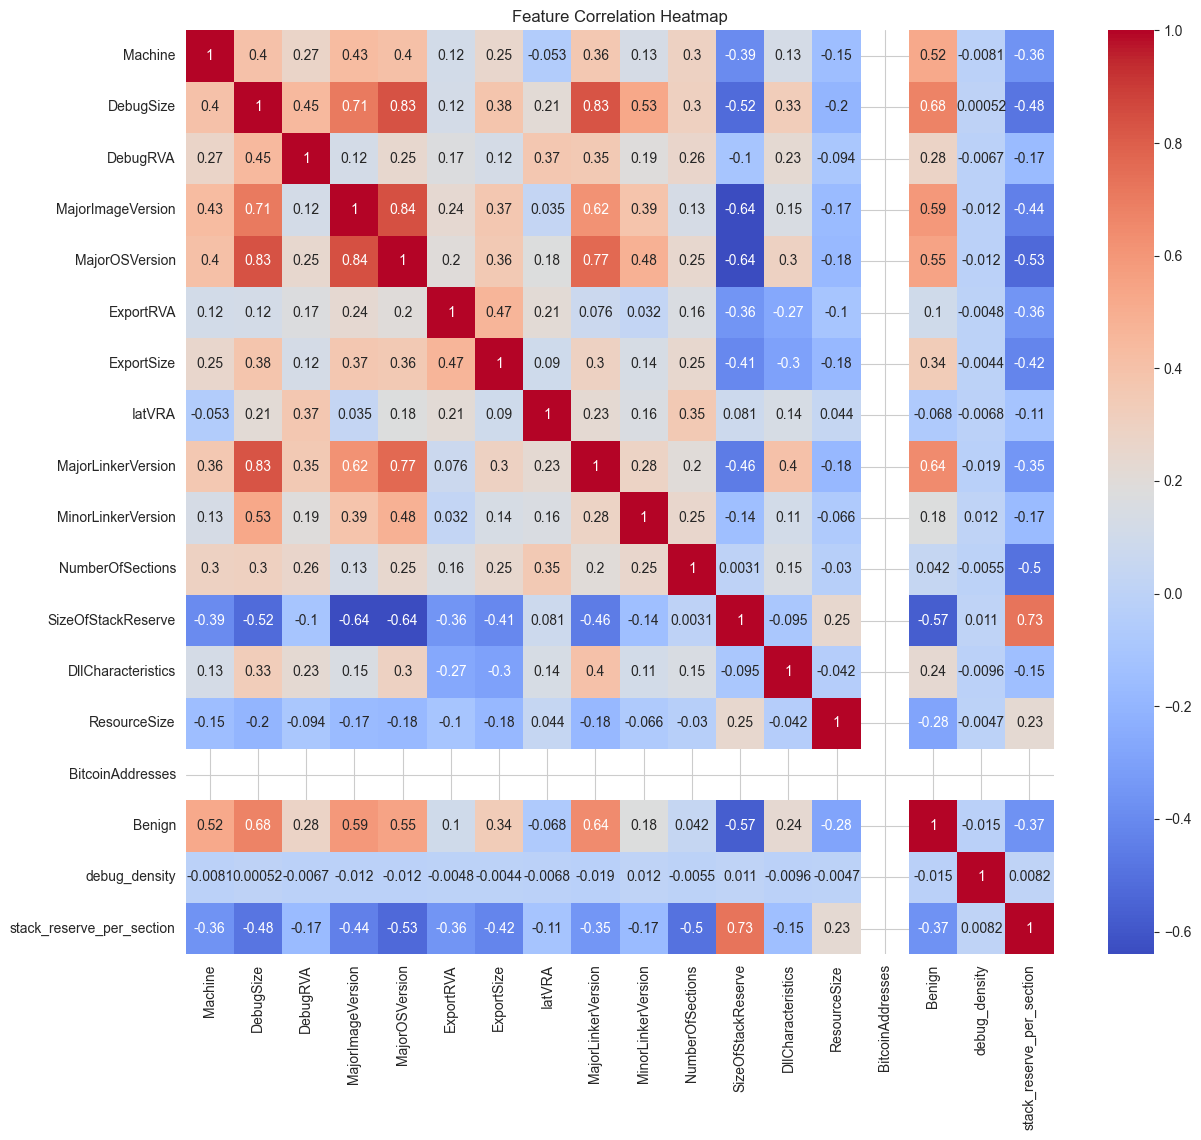

In [170]:
#feature transformation

#correlation Analysis
#Find features that are too similar to each other.
#(If two features are highly correlated (like 0.95), they give the same information. can drop one to reduce redundancy.)

import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation or plotting
numeric_df = df.select_dtypes(include=['number'])

#Show how features related to each other

corr_matrix = numeric_df.corr()

#Plot a heatmap to visualize

plt.figure(figsize = (14,12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [171]:
from sklearn.feature_selection import SelectKBest, f_classif

# Define target and feature columns
target_col = 'Benign'
id_cols = ['FileName', 'md5Hash']  # These aren't in your dataset, so we'll handle them safely

# Drop non-feature columns if they exist
x = df.drop(columns=[col for col in id_cols + [target_col] if col in df.columns])
y = df[target_col]

# Select top 10 features using ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=10)
x_new = selector.fit_transform(x, y)

# Show selected feature names
selected_features = x.columns[selector.get_support()]
print("Top 10 selected features:", selected_features.tolist())

Top 10 selected features: ['Machine', 'DebugSize', 'DebugRVA', 'MajorImageVersion', 'MajorOSVersion', 'ExportSize', 'MajorLinkerVersion', 'SizeOfStackReserve', 'ResourceSize', 'stack_reserve_per_section']


C:\Users\PN Tech\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [14] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\PN Tech\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


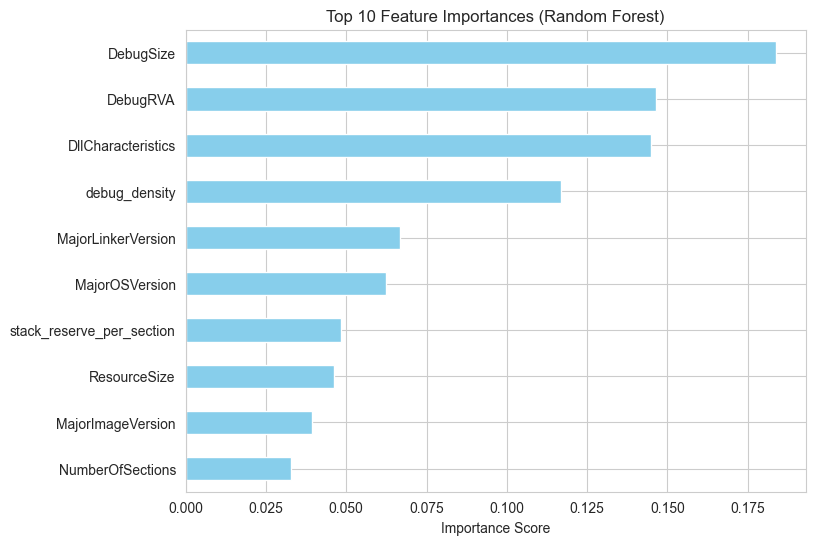

In [172]:
#Random Forest Feature Importance
#Use a machine learning model to find out which features are most important

#import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

#Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(x, y)

# Get importance scores
importances = model.feature_importances_
#Convert to a pandas Series for easy sorting and plotting
feature_importance = pd.Series(importances, index=x.columns).sort_values(ascending=False)

# Plot top 10 features
feature_importance.head(10).plot(kind='barh', figsize=(8,6), color='skyblue')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.show()

In [173]:
#Log Transformation (Optional but Smart)
#Fix skewed features that might confuse the model

#Import Numpy for mathematical operations
import numpy as np

#Apply log transformation to reduce skewness
# log1p(x) is safer than log(x) because it handles zero values (log(0) is undefined)
df['log_DebugSize'] = np.log1p(df['DebugSize'])
df['log_ExportSize'] = np.log1p(df['ExportSize'])

In [174]:
#Validate Your Feature Set

#Import cross-validation tool
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

#Use only the selected features from SelectKBest
x_selected = x[selected_features]
y = df['Benign']  # Target column

#Evaluate model performance using 5-fold cross-validation
scores = cross_val_score(RandomForestClassifier(random_state=42), x_selected, y, cv=5, scoring='accuracy')

#Print the average accuracy across folds
print("Cross-validated accuracy using selected features:", round(scores.mean(), 4))

Cross-validated accuracy using selected features: 0.9861


In [175]:
#IT 24104242 - Panchali S.A.D.A
#Data Formatting

In [176]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [177]:
#before main process start quick check up of dataset

summary = pd.DataFrame({
    'Column': df.columns,
    'Data Type': df.dtypes.values,
    'Missing Values': df.isnull().sum().values,
    'Unique Values': [df[col].nunique() for col in df.columns]
})

print(" Column Summary:")
print(summary)


 Column Summary:
                       Column Data Type  Missing Values  Unique Values
0                     Machine     int64               0              5
1                   DebugSize     int64               0             10
2                    DebugRVA     int64               0           3853
3           MajorImageVersion     int64               0             21
4              MajorOSVersion     int64               0             11
5                   ExportRVA     int64               0           4956
6                  ExportSize     int64               0            380
7                      IatVRA     int64               0           1653
8          MajorLinkerVersion     int64               0             20
9          MinorLinkerVersion     int64               0             25
10           NumberOfSections     int64               0              9
11         SizeOfStackReserve     int64               0             13
12         DllCharacteristics     int64               0     

In [178]:
#Explore Data

#check the shpae of dataset (rows and columns)
print("Shape of dataset : ", df.shape)
print()
# Check data types and non-null counts
df.info()
print()
# View basic statistics for numerical columns
df.describe()

Shape of dataset :  (15222, 20)

<class 'pandas.core.frame.DataFrame'>
Index: 15222 entries, 0 to 62469
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Machine                    15222 non-null  int64  
 1   DebugSize                  15222 non-null  int64  
 2   DebugRVA                   15222 non-null  int64  
 3   MajorImageVersion          15222 non-null  int64  
 4   MajorOSVersion             15222 non-null  int64  
 5   ExportRVA                  15222 non-null  int64  
 6   ExportSize                 15222 non-null  int64  
 7   IatVRA                     15222 non-null  int64  
 8   MajorLinkerVersion         15222 non-null  int64  
 9   MinorLinkerVersion         15222 non-null  int64  
 10  NumberOfSections           15222 non-null  int64  
 11  SizeOfStackReserve         15222 non-null  int64  
 12  DllCharacteristics         15222 non-null  int64  
 13  ResourceSize      

,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign,debug_density,stack_reserve_per_section,log_DebugSize,log_ExportSize
count,15222.000000,15222.000000,15222.000000,15222.000000,15222.000000,15222.000000,15222.000000,15222.000000,15222.000000,15222.000000,15222.000000,1.522200e+04,15222.000000,15222.000000,15222.0,15222.000000,1.522200e+04,1.522200e+04,15222.000000,15222.000000
mean,11433.422940,34.510905,19503.101498,4.591906,6.332808,39043.436014,77.700828,32506.441269,9.900801,4.079884,4.738865,6.655618e+05,12918.499934,8895.791683,0.0,0.638287,4.861418e+02,1.634404e+05,2.496664,2.471874
std,16001.121233,33.575670,33861.129834,4.318133,2.340644,66092.916506,97.332405,48161.447211,3.294376,5.711794,1.553906,4.230323e+05,15698.731283,14422.598577,0.0,0.480512,4.184843e+04,1.406121e+05,1.893558,2.486656
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,332.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,4096.000000,8.000000,0.000000,4.000000,2.621440e+05,0.000000,1061.000000,0.0,0.000000,0.000000e+00,5.242870e+04,0.000000,0.000000
50%,332.000000,28.000000,4720.000000,6.000000,6.000000,4128.000000,51.000000,8192.000000,9.000000,0.000000,5.000000,5.242880e+05,1344.000000,1848.000000,0.0,1.000000,1.188590e-03,1.310713e+05,3.367296,3.951244
75%,34404.000000,84.000000,19440.000000,10.000000,10.000000,53204.000000,135.000000,45056.000000,14.000000,10.000000,6.000000,1.048576e+06,32768.000000,8768.000000,0.0,1.000000,5.852843e-03,2.621433e+05,4.442651,4.912655
max,43620.000000,135.000000,162848.000000,24.000000,11.000000,327248.000000,454.000000,249856.000000,19.000000,25.000000,9.000000,2.097152e+06,53600.000000,65376.000000,0.0,1.000000,4.900000e+06,1.048571e+06,4.912655,6.120297


In [179]:
#Now start main process
# 1. Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [180]:
# 2. Validate and adjust data types
# Printing data types before formatting

print("\nData types before formatting:\n", df.dtypes)



Data types before formatting:
 machine                        int64
debugsize                      int64
debugrva                       int64
majorimageversion              int64
majorosversion                 int64
exportrva                      int64
exportsize                     int64
iatvra                         int64
majorlinkerversion             int64
minorlinkerversion             int64
numberofsections               int64
sizeofstackreserve             int64
dllcharacteristics             int64
resourcesize                   int64
bitcoinaddresses               int64
benign                         int64
debug_density                float64
stack_reserve_per_section    float64
log_debugsize                float64
log_exportsize               float64
dtype: object


In [181]:
# Convert 'machine' to categorical (since it's not continuous numeric)

if "machine" in df.columns:
 df["machine"] = df["machine"].astype("category")


In [182]:
# Ensure target is integer

if "benign" in df.columns:
    df["benign"] = df["benign"].astype(int)



In [183]:
#  Validate numeric columns are truly numeric
numeric_cols = ['debugsize', 'exportsize', 'resourcesize']
for col in numeric_cols:
    if col in df.columns:
        type_counts = df[col].apply(type).value_counts()
        print(f"\n Value types in '{col}':")
        for t, count in type_counts.items():
            print(f"{t.__name__}: {count} values")
    else:
        print(f" Column '{col}' not found.")





 Value types in 'debugsize':
int: 15222 values

 Value types in 'exportsize':
int: 15222 values

 Value types in 'resourcesize':
int: 15222 values


In [184]:
# Validate categorical columns
categorical_cols = ['machine']  #

for col in categorical_cols:
    if col in df.columns:
        print(f"\n Categorical column '{col}':")
        print(f"Unique categories: {df[col].nunique()}")
        print(f"Categories: {df[col].unique()}")
    else:
        print(f" Column '{col}' not found.")



 Categorical column 'machine':
Unique categories: 5
Categories: [332, 34404, 43620, 452, 0]
Categories (5, int64): [0, 332, 452, 34404, 43620]


In [185]:
# printing the data types after formatting
print("\nData types after formatting:\n", df.dtypes)


Data types after formatting:
 machine                      category
debugsize                       int64
debugrva                        int64
majorimageversion               int64
majorosversion                  int64
exportrva                       int64
exportsize                      int64
iatvra                          int64
majorlinkerversion              int64
minorlinkerversion              int64
numberofsections                int64
sizeofstackreserve              int64
dllcharacteristics              int64
resourcesize                    int64
bitcoinaddresses                int64
benign                          int64
debug_density                 float64
stack_reserve_per_section     float64
log_debugsize                 float64
log_exportsize                float64
dtype: object


In [186]:
 #3. Check schema consistency

print("\nDataset Info After Formatting")

df.info()




Dataset Info After Formatting
<class 'pandas.core.frame.DataFrame'>
Index: 15222 entries, 0 to 62469
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   machine                    15222 non-null  category
 1   debugsize                  15222 non-null  int64   
 2   debugrva                   15222 non-null  int64   
 3   majorimageversion          15222 non-null  int64   
 4   majorosversion             15222 non-null  int64   
 5   exportrva                  15222 non-null  int64   
 6   exportsize                 15222 non-null  int64   
 7   iatvra                     15222 non-null  int64   
 8   majorlinkerversion         15222 non-null  int64   
 9   minorlinkerversion         15222 non-null  int64   
 10  numberofsections           15222 non-null  int64   
 11  sizeofstackreserve         15222 non-null  int64   
 12  dllcharacteristics         15222 non-null  int64   
 13  resou

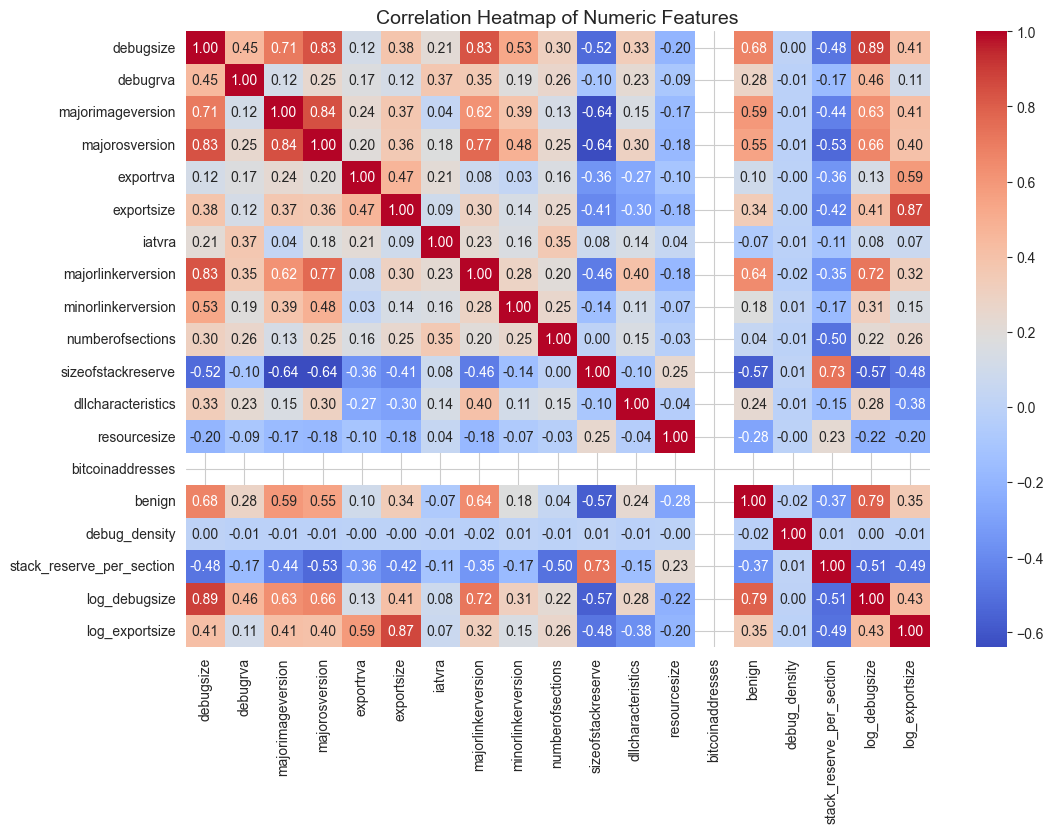

In [187]:
# 4. EDAVisualizations

#  Correlation Heatmap for numeric features

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
plt.show()

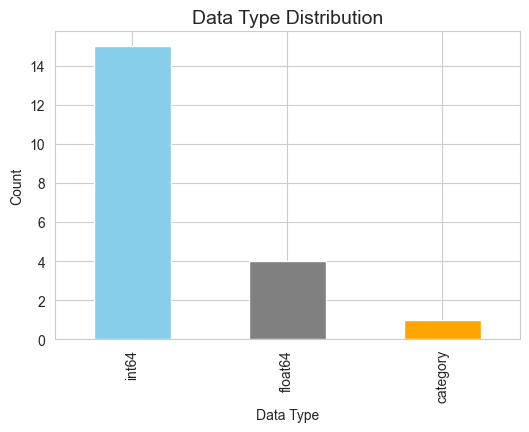

In [188]:
# (b) Data type distribution with custom colors
dtype_counts = df.dtypes.value_counts()

# Define custom colors for each data type
color_map = {
    'int64': 'skyblue',
    'object': 'lightgreen',
    'category': 'orange'
}

# Map colors to the bars
colors = [color_map.get(str(dt), 'grey') for dt in dtype_counts.index]

# Plot
plt.figure(figsize=(6,4))
ax = dtype_counts.plot(kind="bar", color=colors)
plt.title("Data Type Distribution", fontsize=14)
plt.xlabel("Data Type")
plt.ylabel("Count")


plt.show()

